# Drawing Conclusions Using Query

In [1]:
# Load 'winequality_edited.csv,' a file you previously created
# in this workspace and worked with in the concepts
# "Appending Data(cont.)" and "Exploring with Visuals"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("winequality_edited.csv")

df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium


In [2]:
df.tail(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,High
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,Low
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,Medium


### Do wines with higher alcoholic content receive better ratings?

In [3]:
# get the median amount of alcohol content
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'acidity_levels'],
      dtype='object')

In [9]:
df.shape

(6497, 14)

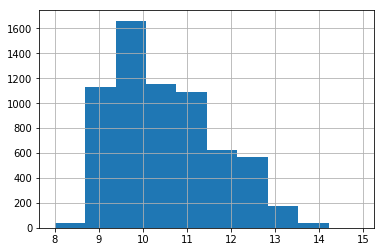

In [13]:
df["alcohol"].hist();

Recall, Alcohol ditribution is skewed (ie not normal), so the central tendency to use is Median.

In [14]:
df["alcohol"].median()

10.300000000000001

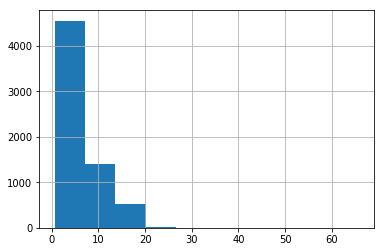

In [16]:
# get the median amount of residual sugar
df["residual_sugar"].hist();

Recall, Residual Sugar ditribution is skewed (ie not normal), so the central tendency to use is Median.

In [25]:
df["residual_sugar"].median()

3.0

In [27]:
low_alcohol = df[df["alcohol"] < (df["alcohol"].median())]

In [29]:
# select samples with alcohol content less than the median
low_alcohol = df.query("alcohol < 10.3")

# select samples with alcohol content greater than or equal to the median
high_alcohol = df.query("alcohol >= 10.3")

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [35]:
print("Shape of the data is",df.shape,"where row is",df.shape[0],"and column is", df.shape[1])

Shape of the data is (6497, 14) where row is 6497 and column is 14


In [38]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium


In [39]:
low_alcohol["quality"].mean()

5.475920679886686

In [40]:
high_alcohol["quality"].mean()

6.1460843373493974

### Do sweeter wines receive better ratings?

In [41]:
# select samples with residual sugar less than the median
low_sugar = df.query("residual_sugar < 3.0")

# select samples with residual sugar greater than or equal to the median
high_sugar = df.query("residual_sugar >= 3.0")

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [42]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar["quality"].mean()

5.8088007437248219

In [43]:
high_sugar["quality"].mean()

5.8278287461773699